# Xns11 - basic

## Overview

In [1]:
import mikeio1d
xns = mikeio1d.open("../data/mikep_cs_demo.xns11")
xns

<mikeio1d.Xns11 (103)>

In [2]:
xns.to_dataframe().head()

## Plotting

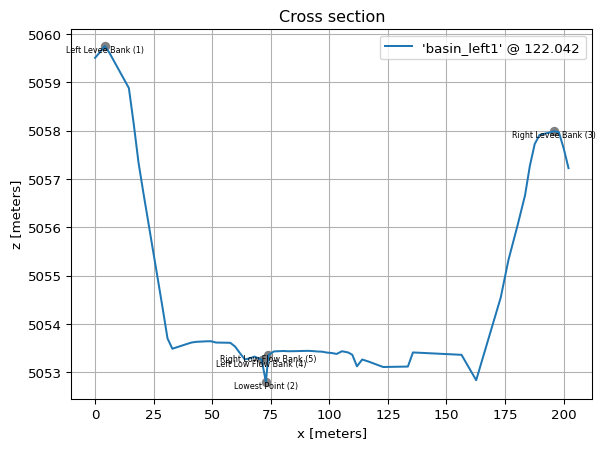

In [3]:
xns['basin_left1','122.042','1'].plot()

## Extracting data

In [4]:
xns['basin_left1','122.042','1'].raw.head()

In [5]:
xns['basin_left1','122.042','1'].markers

In [6]:
xns['basin_left1','122.042','1'].processed.head()

## Selecting cross sections

In [7]:
xns['basin_left1','122.042','1']

<CrossSection: basin_left1, 122.042, 1>

In [8]:
xns.sel(location_id='basin_left1', chainage=122.042, topo_id='1')

<CrossSection: basin_left1, 122.042, 1>

In [9]:
# Use ':' or '...' as a wildcard to return a list of sections
xns['basin_left1', :, '1']

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>]

In [10]:
# Similar to above, but using the 'sel' method.
xns.sel(location_id='basin_left1')

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>]

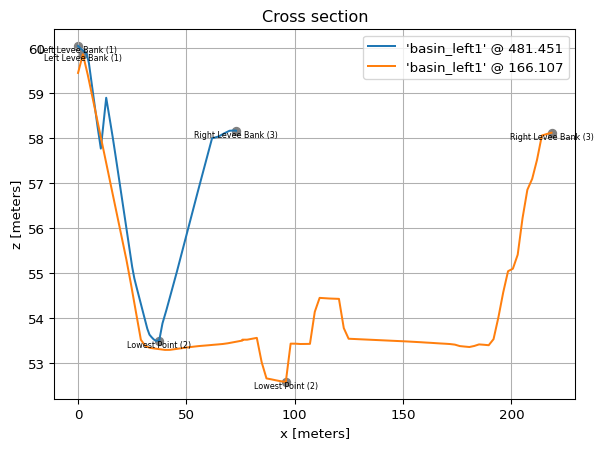

In [11]:
# Combine multiple cross sections into one plot.
from mikeio1d import Xns11

cross_sections = [*xns['basin_left1','481.451', ...], *xns['basin_left1','166.107', ...]]
cross_sections = Xns11(cross_sections)
cross_sections.plot()

## Creating cross sections

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from mikeio1d.xns11 import CrossSection

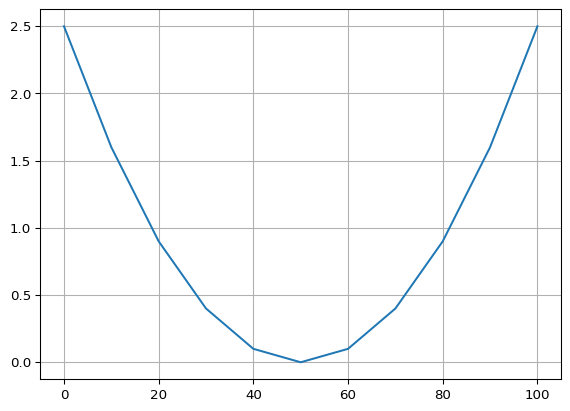

In [13]:
n_points = 11
x = np.linspace(0, 100, n_points)
z = 10**-3 * (x-50)**2
plt.grid(True)
plt.plot(x, z)

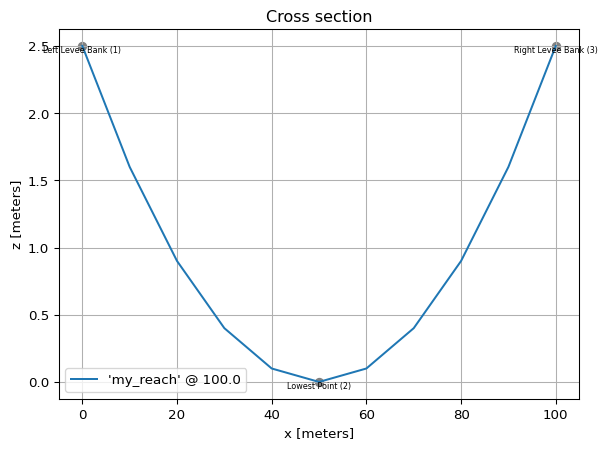

In [14]:
location_id = "my_reach"
chainage = 100.0
topo_id = "my_topo"

xs = CrossSection.from_xz(x, z, location_id, chainage, topo_id)
xs.plot()

## Writing Xns11 files

In [15]:
xns_custom = Xns11()
xns_custom.add(xs)
xns_custom.write("my_custom.xns11")
xns_custom.to_dataframe()

In [16]:
# Subset an existing Xns11 file
subset = xns.sel(location_id='basin_left1')
xns_subset = Xns11(subset)
xns_subset.write("my_subset.xns11")
xns_subset.to_dataframe()

``` python
# Clean up
import os
os.remove("my_custom.xns11")
os.remove("my_subset.xns11")
```

## Modifying cross sections

In [18]:
xs = xns['basin_left1','122.042','1']
raw_copy = xs.raw.copy()
raw_copy.head()

In [19]:
raw_copy['z'] = raw_copy['z'] + 1000
raw_copy.head()

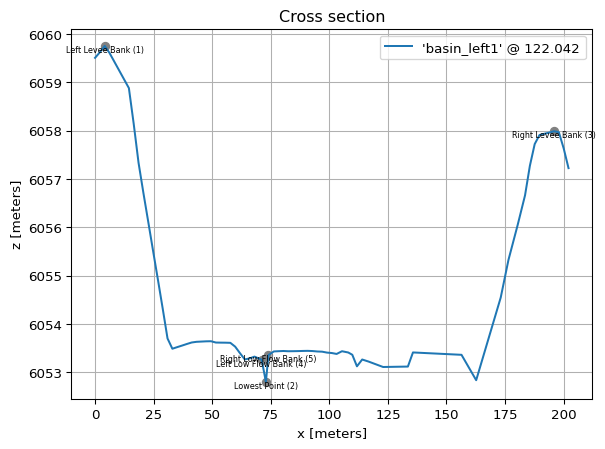

In [20]:
xs.raw = raw_copy
xs.plot()

In [21]:
from mikeio1d.cross_sections import Marker

xs.set_marker(Marker.LEFT_LOW_FLOW_BANK, x=70)
xs.set_marker(Marker.RIGHT_LOW_FLOW_BANK, x=74)
xs.markers

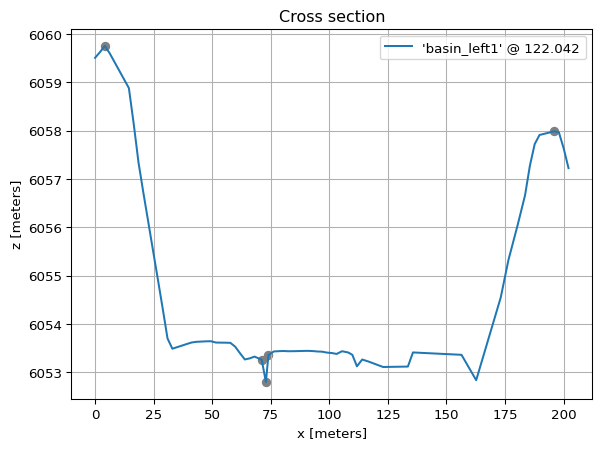

In [22]:
xs.plot(with_marker_labels=False)

In [23]:
# Write the modified cross section back to the Xns11 file.
xns.write()

## GeoPandas

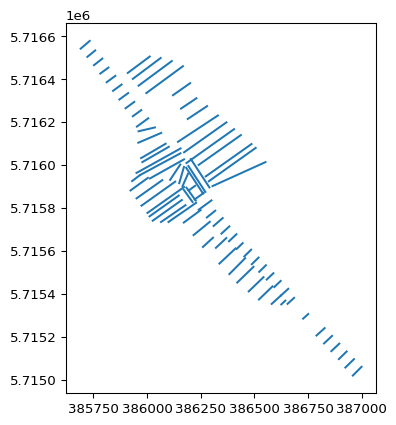

In [24]:
gdf = xns.to_geopandas()
gdf.plot()

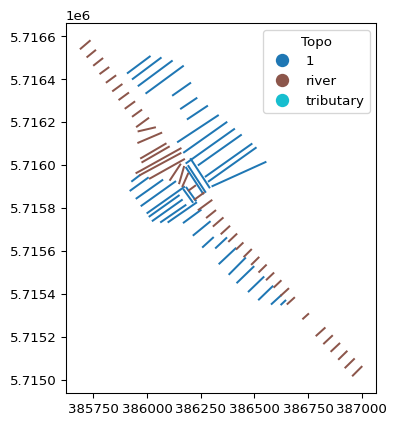

In [25]:
gdf = xns.to_geopandas()
gdf.plot(column='topo_id', legend=True, legend_kwds={'title': 'Topo'})

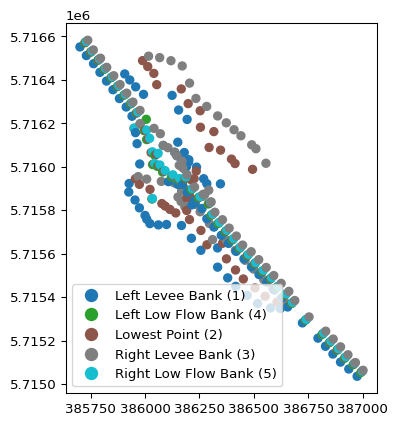

In [26]:
# Plot all of the markers.
xns.to_geopandas(mode='markers').plot("marker_label", legend=True)

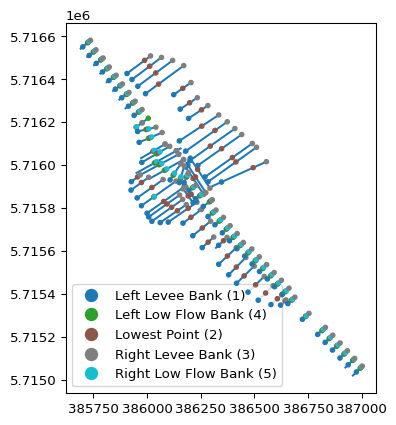

In [27]:
# Plot markers on top of cross sections.

gdf1 = xns.to_geopandas(mode='sections')
gdf2 = xns.to_geopandas(mode='markers')

ax = gdf1.plot()

gdf2.plot(ax=ax, column="marker_label", markersize=10, zorder=10, legend=True)